# TASK 1: IMPORT PACKAGES AND LOAD DATA

In [1]:
## Task 2.1 Merge 12 months

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt

path = "C:/Users/LENOVO/Downloads/total data/"
frames = []
all_length = []

for file in os.listdir(path):
    if file.endswith(".csv"):
       filepath = path + file
       df1 = pd.read_csv(filepath)
       frames.append(df1)
       all_length.append(len(df1.index))
       result = pd.concat(frames)
    
result.to_csv('annualSales2019.csv', index = False)

# TASK 2: IMPORT DATA

In [33]:
## Task 2.1 Auto import

In [43]:
filepath = input('Please input your filepath: ')
df = pd.read_csv(filepath)
df.head()

Please input your filepath: C:\Users\LENOVO\Downloads\annualSales2019.csv


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [37]:
## Task 2.2 Add "Month" column

In [44]:
df['Month'] = df['Order Date'].str[0:2]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [53]:
## Task 2.3 Drop "NA" and "Or" value

In [20]:
value = set(df['Month'])

In [45]:
df.dropna(how = "all")
df = df[df['Month'] != "Or"]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


# TASK 3: REPORTING

In [ ]:
## Answer these questions:
1. What was the best month for sales? How much was earned that month?
2. What city has the best sales?
3. What time should we display ads to maximize the likelihood of customer’s buying product?
4. What products are most often sold together?
5. What product sold the most? Why do you think it sold the most?

In [67]:
### Task 3.1 What was the best month for sales? How much was earned that month?

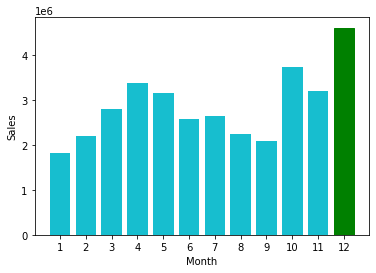

In [46]:
df['Price Each'] = pd.to_numeric(df['Price Each'])
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Sales'] = df['Price Each'] * df['Quantity Ordered']
moving_column = df.pop('Sales')
df.insert(4, 'Sales', moving_column)
sales_values = df.groupby('Month').sum()['Sales']
months = range(1,13)
barplot = plt.bar(x = months, height = sales_values, color="tab:cyan")
barplot[11].set_color("g")
plt.xticks(months)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

In [1]:
## Task 3.2 What city has the best sale?

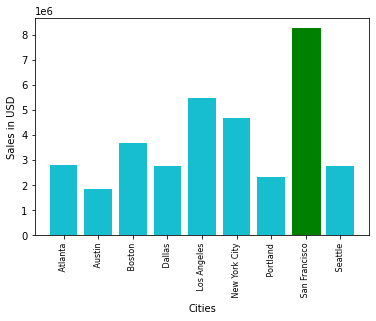

In [62]:
df['City'] = df['Purchase Address'].apply(lambda x: x.split(",")[1] if type (x) == str else str (x))
df = df[df['City'] != "nan"]
df.groupby('City').sum()['Sales']
sales_value_city = df.groupby('City').sum()['Sales']
cities = [city for city, sales in sales_value_city.items()]
barcity = plt.bar(x=cities, height=sales_value_city, color = "tab:cyan")
barcity[7].set_color('g')
plt.xticks(cities, rotation=90, size=8)
plt.xlabel('Cities')
plt.ylabel('Sales in USD')
plt.show()

In [ ]:
## Task 3.3: What time should we display ads to maximize the likelihood of customer’s buying product?

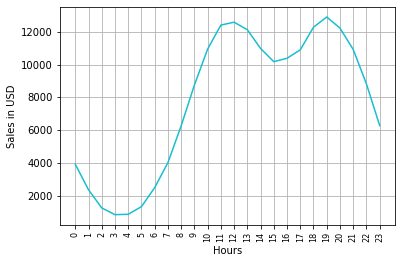

In [66]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Hours'] = df['Order Date'].dt.hour
sales_value_hours = df.groupby('Hours').count()['Sales']
hours = [hour for hour, sales in sales_value_hours.items()]
plt.plot(hours, sales_value_hours, color = "tab:cyan")
plt.grid()
plt.xticks(hours, rotation=90, size=8)
plt.xlabel('Hours')
plt.ylabel('Sales in USD')
plt.show()

In [67]:
## Task 3.4: What products are most often sold together?

In [73]:
df_dup = df[df['Order ID'].duplicated(keep=False)]
groupProduct = lambda product: ', '.join(product)
df_dup['All Products'] = df_dup.groupby('Order ID')['Product'].transform(groupProduct)
df_dup = df_dup[['Order ID', 'All Products']].drop_duplicates()
df_dup['All Products'].value_counts().head(10)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16896\427715042.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['All Products'] = df_dup.groupby('Order ID')['Product'].transform(groupProduct)


iPhone, Lightning Charging Cable                        882
Google Phone, USB-C Charging Cable                      856
iPhone, Wired Headphones                                361
Vareebadd Phone, USB-C Charging Cable                   312
Google Phone, Wired Headphones                          303
iPhone, Apple Airpods Headphones                        286
Google Phone, Bose SoundSport Headphones                161
Vareebadd Phone, Wired Headphones                       104
Google Phone, USB-C Charging Cable, Wired Headphones     77
Vareebadd Phone, Bose SoundSport Headphones              60
Name: All Products, dtype: int64

In [69]:
## Task 3.5: What product sold the most? Why do you think it sold the most?

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16896\3499063222.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products_ls, rotation=90, size=8)


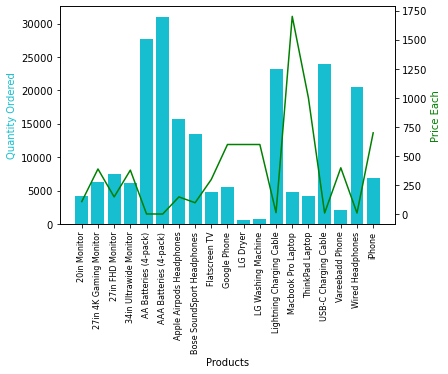

In [74]:
all_products = df.groupby('Product').sum()['Quantity Ordered']
prices = df.groupby('Product').mean()['Price Each']
products_ls = [product for product, quant in all_products.items()]

x = products_ls
y1 = all_products
y2 = prices

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(x, y1, color='tab:cyan')
ax2.plot(x, y2, 'g')

ax1.set_xticklabels(products_ls, rotation=90, size=8)
ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered', color='tab:cyan')
ax2.set_ylabel('Price Each', color='g')

plt.show()
